# Algoritmo K-Fold

Este algoritmo divide un conjunto de datos en un número K. Tomemos por ejemplo K+5. 
En este escenario, el método dividirá el conjunto de datos en cinco pliegues. 
Utiliza el primer pliegue en la primera iteración para probar el modelo. Utiliza los conjuntos de datos restantes para entrenar el modelo.
    
    https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/ 

In [84]:
# Imports
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

# Gráfica
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [85]:
dfP = pd.read_csv("pokemon.csv")

In [86]:
# Limpia los valores nulos de speed
dfSp = dfP.dropna(subset = ['speed', 'height_m', 'weight_kg'])
# Selecciona y baraja los 5000 primeros de todas las columnas 
dfSp = dfSp.sample(frac=1).head(5000)

# Reseteamos el index de nuestra base de datos al hacer selección aleatoria para que comience de nuevo en 0.
dfSp = dfSp.reset_index()

X = dfSp[['height_m', 'weight_kg']]
Y = dfSp['speed']

In [87]:
# Hacemos una partición en 10 bloques, y cada vez que haga una partición mezcle los datos shuffle = True
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(X)

10

In [97]:
regr = linear_model.LinearRegression()

resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("R: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))
print("R medio: ", np.mean(resultados))

R:  -0.030637180173013645
R:  0.046681137622567426
R:  0.08453301387974665
R:  0.02711526197541292
R:  0.03642850030568945
R:  -0.16302835065456156
R:  0.030260678860028367
R:  0.08702099073608605
R:  0.020424617852539684
R:  0.14792842599860956
R medio:  0.02867270964031049


In [98]:
X_ = dfSp['height_m']
Y_ = dfSp['weight_kg']
Z_ = dfSp['speed']

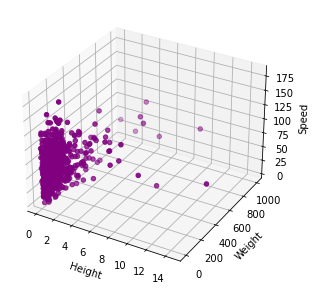

In [105]:
t3 = plt.figure(figsize=(10,5)).gca(projection='3d')

t3.scatter(X_, Y_, Z_, color = "purple")
#t3.plot(X_, Y_, predicciones, color = "blue")

t3.set_xlabel('Height')
t3.set_ylabel('Weight')
t3.set_zlabel('Speed')

plt.show()